In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
wellness_df = pd.read_csv("../Resources/Wellbeing_and_lifestyle_data_Kaggle.csv")
wellness_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [20]:
# Convert dates without times using one format string
no_time = wellness_df['Timestamp'].str.len() <= 8  # Assuming that dates without times are 8 characters or fewer
wellness_df.loc[no_time, 'Timestamp'] = pd.to_datetime(wellness_df.loc[no_time, 'Timestamp'], format='%m/%d/%y', errors='coerce')

# Convert dates with times using another format string
with_time = ~no_time
wellness_df.loc[with_time, 'Timestamp'] = pd.to_datetime(wellness_df.loc[with_time, 'Timestamp'], format='%m/%d/%y %H:%M', errors='coerce')


In [24]:
wellness_df



,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07 00:00:00,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07 00:00:00,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07 00:00:00,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,2015-07-07 00:00:00,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,2015-07-07 00:00:00,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,2021-03-14 05:42:00,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,2021-03-14 06:30:00,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,2021-03-14 08:35:00,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,2021-03-14 08:43:00,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [25]:
selected_columns = ['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'SOCIAL_NETWORK', 'DAILY_STEPS', 'SLEEP_HOURS', 'LOST_VACATION']

df_selected = wellness_df[selected_columns]
df_selected


,Timestamp,FRUITS_VEGGIES,PLACES_VISITED,SOCIAL_NETWORK,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION
0,2015-07-07 00:00:00,3,2,5,5,7,5
1,2015-07-07 00:00:00,2,4,10,5,8,2
2,2015-07-07 00:00:00,2,3,10,4,8,10
3,2015-07-07 00:00:00,3,10,7,5,5,7
4,2015-07-07 00:00:00,5,3,4,5,7,0
...,...,...,...,...,...,...,...
15967,2021-03-14 05:42:00,3,0,10,10,7,0
15968,2021-03-14 06:30:00,3,6,4,6,6,0
15969,2021-03-14 08:35:00,4,0,8,5,7,0
15970,2021-03-14 08:43:00,1,10,7,1,8,7


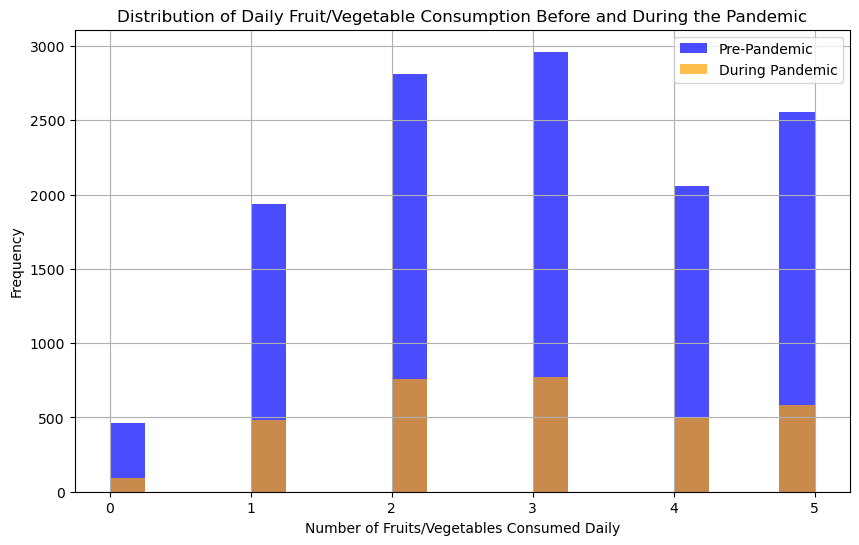

In [29]:
import matplotlib.pyplot as plt

pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for daily fruit and vegetable consumption before and during the pandemic
pre_pandemic_consumption = df_selected[df_selected['Timestamp'] < pandemic_start_date]['FRUITS_VEGGIES']
pandemic_consumption = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['FRUITS_VEGGIES']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
ax.hist(pre_pandemic_consumption, bins=20, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_consumption, bins=20, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('Number of Fruits/Vegetables Consumed Daily')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Daily Fruit/Vegetable Consumption Before and During the Pandemic')
ax.legend()

# Show plot
plt.grid(True)
plt.show()


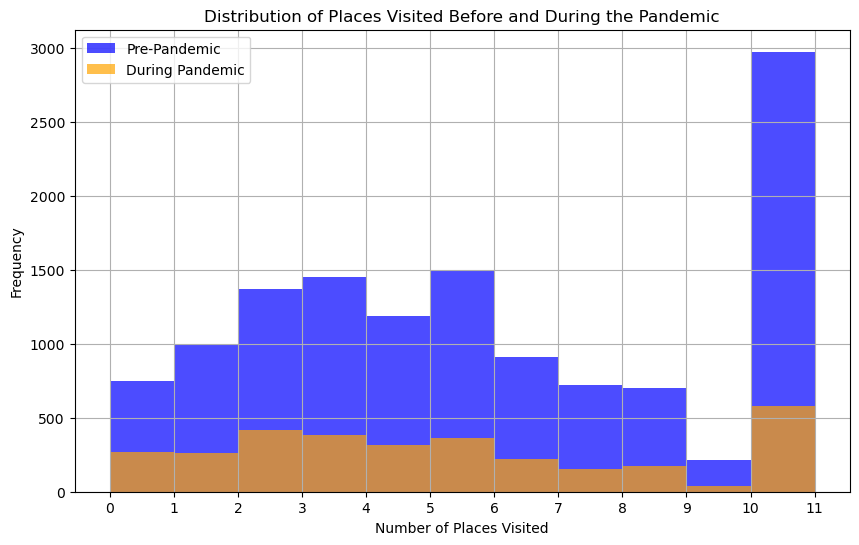

In [31]:
pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for places visited before and during the pandemic
pre_pandemic_places = df_selected[df_selected['Timestamp'] < pandemic_start_date]['PLACES_VISITED']
pandemic_places = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['PLACES_VISITED']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
# We use bins corresponding to the range of 'PLACES_VISITED' values
bins = range(int(min(df_selected['PLACES_VISITED'])), int(max(df_selected['PLACES_VISITED'])) + 2)

ax.hist(pre_pandemic_places, bins=bins, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_places, bins=bins, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('Number of Places Visited')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Places Visited Before and During the Pandemic')
ax.legend()

# Show plot
plt.xticks(bins)
plt.grid(True)
plt.show()

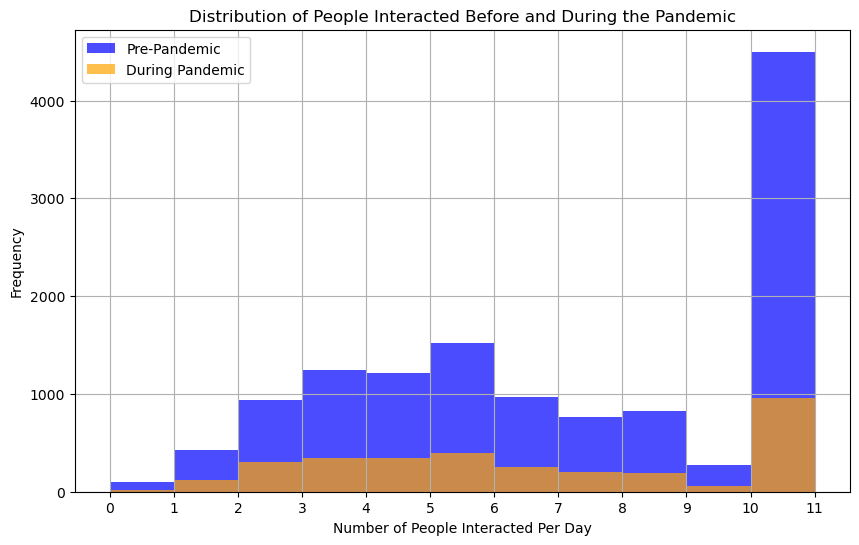

In [33]:
pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for places visited before and during the pandemic
pre_pandemic_places = df_selected[df_selected['Timestamp'] < pandemic_start_date]['SOCIAL_NETWORK']
pandemic_places = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['SOCIAL_NETWORK']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
# We use bins corresponding to the range of 'PLACES_VISITED' values
bins = range(int(min(df_selected['SOCIAL_NETWORK'])), int(max(df_selected['SOCIAL_NETWORK'])) + 2)

ax.hist(pre_pandemic_places, bins=bins, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_places, bins=bins, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('Number of People Interacted Per Day')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of People Interacted Before and During the Pandemic')
ax.legend()

# Show plot
plt.xticks(bins)
plt.grid(True)
plt.show()

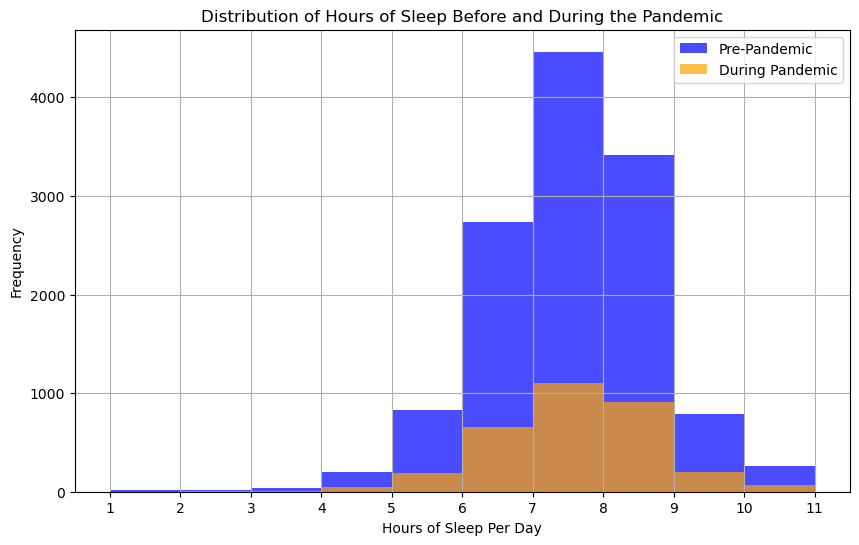

In [34]:
pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for places visited before and during the pandemic
pre_pandemic_places = df_selected[df_selected['Timestamp'] < pandemic_start_date]['SLEEP_HOURS']
pandemic_places = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['SLEEP_HOURS']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
# We use bins corresponding to the range of 'PLACES_VISITED' values
bins = range(int(min(df_selected['SLEEP_HOURS'])), int(max(df_selected['SLEEP_HOURS'])) + 2)

ax.hist(pre_pandemic_places, bins=bins, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_places, bins=bins, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('Hours of Sleep Per Day')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Hours of Sleep Before and During the Pandemic')
ax.legend()

# Show plot
plt.xticks(bins)
plt.grid(True)
plt.show()

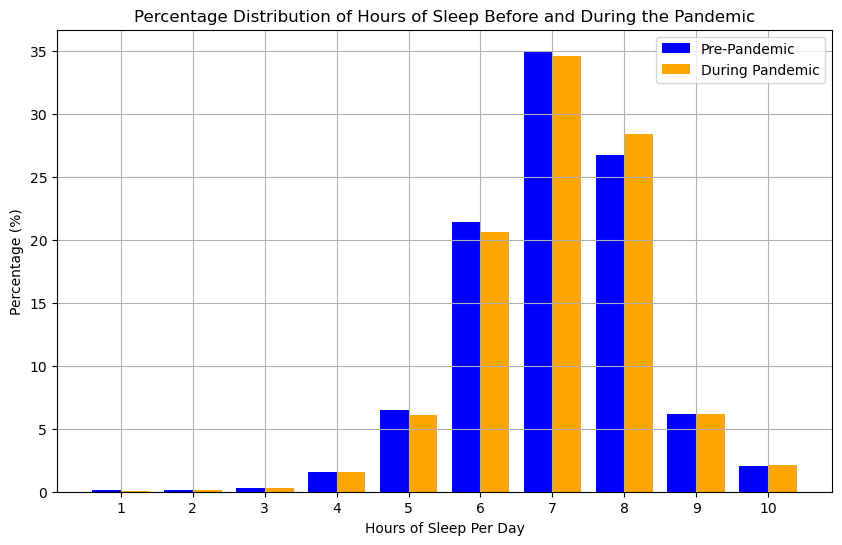

In [39]:


# Assuming df_selected is your DataFrame and it's already loaded.

pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for sleep hours before and during the pandemic
pre_pandemic_data = df_selected[df_selected['Timestamp'] < pandemic_start_date]
during_pandemic_data = df_selected[df_selected['Timestamp'] >= pandemic_start_date]

# Get total counts for normalization
total_pre_pandemic = pre_pandemic_data['SLEEP_HOURS'].count()
total_during_pandemic = during_pandemic_data['SLEEP_HOURS'].count()

# Calculate the frequency for each sleep hour category
pre_pandemic_counts = pre_pandemic_data['SLEEP_HOURS'].value_counts().sort_index() / total_pre_pandemic * 100
during_pandemic_counts = during_pandemic_data['SLEEP_HOURS'].value_counts().sort_index() / total_during_pandemic * 100

# Ensure both series have the same index for proper comparison
all_hours = sorted(set(pre_pandemic_counts.index) | set(during_pandemic_counts.index))
pre_pandemic_counts = pre_pandemic_counts.reindex(all_hours, fill_value=0)
during_pandemic_counts = during_pandemic_counts.reindex(all_hours, fill_value=0)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Width of a bar 
width = 0.4

# Setting the positions of the bars
positions = np.arange(len(all_hours))

# Plotting the bars for pre-pandemic and during-pandemic periods
ax.bar(positions - width/2, pre_pandemic_counts, width=width, label='Pre-Pandemic', color='blue')
ax.bar(positions + width/2, during_pandemic_counts, width=width, label='During Pandemic', color='orange')

# Adding labels and title
ax.set_xlabel('Hours of Sleep Per Day')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage Distribution of Hours of Sleep Before and During the Pandemic')
ax.set_xticks(positions)
ax.set_xticklabels(all_hours)
ax.legend()

# Show plot
plt.grid(True)
plt.show()


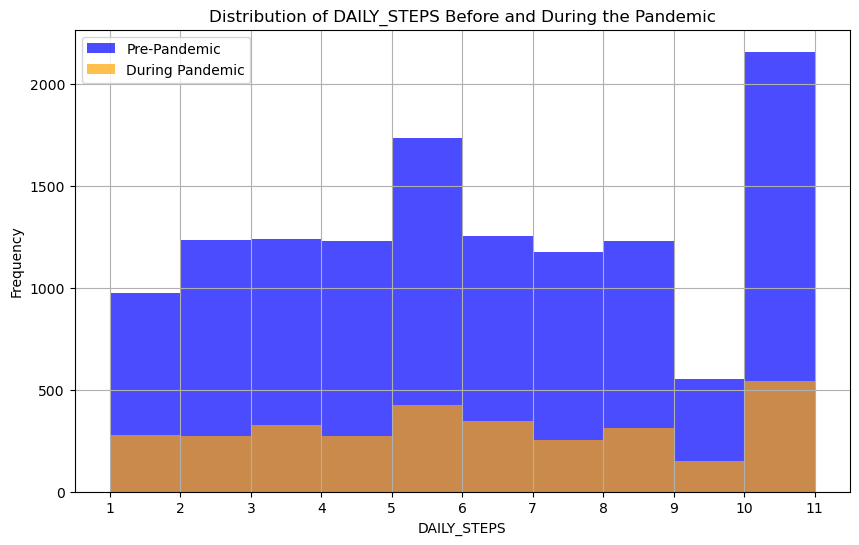

In [35]:
pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for places visited before and during the pandemic
pre_pandemic_places = df_selected[df_selected['Timestamp'] < pandemic_start_date]['DAILY_STEPS']
pandemic_places = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['DAILY_STEPS']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
# We use bins corresponding to the range of 'PLACES_VISITED' values
bins = range(int(min(df_selected['DAILY_STEPS'])), int(max(df_selected['DAILY_STEPS'])) + 2)

ax.hist(pre_pandemic_places, bins=bins, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_places, bins=bins, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('DAILY_STEPS')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of DAILY_STEPS Before and During the Pandemic')
ax.legend()

# Show plot
plt.xticks(bins)
plt.grid(True)
plt.show()

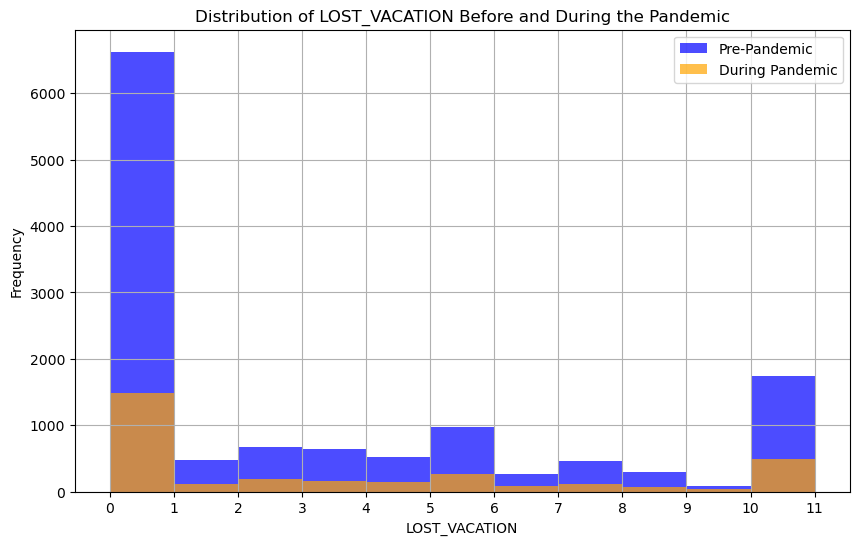

In [36]:
pandemic_start_date = pd.to_datetime('2020-03-01')

# Extract the data for places visited before and during the pandemic
pre_pandemic_places = df_selected[df_selected['Timestamp'] < pandemic_start_date]['LOST_VACATION']
pandemic_places = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['LOST_VACATION']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms for pre-pandemic and pandemic periods
# We use bins corresponding to the range of 'PLACES_VISITED' values
bins = range(int(min(df_selected['LOST_VACATION'])), int(max(df_selected['LOST_VACATION'])) + 2)

ax.hist(pre_pandemic_places, bins=bins, alpha=0.7, label='Pre-Pandemic', color='blue')
ax.hist(pandemic_places, bins=bins, alpha=0.7, label='During Pandemic', color='orange')

# Add labels and title
ax.set_xlabel('LOST_VACATION')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of LOST_VACATION Before and During the Pandemic')
ax.legend()

# Show plot
plt.xticks(bins)
plt.grid(True)
plt.show()

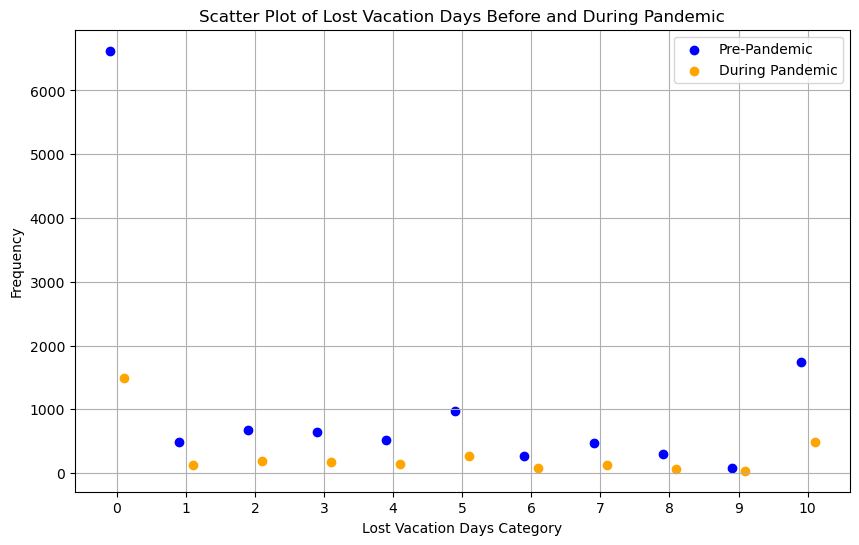

In [41]:


# Assuming df_selected is your DataFrame and it's already loaded with 'LOST_VACATION' as a column.

pandemic_start_date = pd.to_datetime('2020-03-01')

# Calculate the frequencies for each category before and during the pandemic
pre_pandemic_counts = df_selected[df_selected['Timestamp'] < pandemic_start_date]['LOST_VACATION'].value_counts().sort_index()
during_pandemic_counts = df_selected[df_selected['Timestamp'] >= pandemic_start_date]['LOST_VACATION'].value_counts().sort_index()

# Ensure both series have the same index for proper comparison
all_categories = sorted(set(pre_pandemic_counts.index) | set(during_pandemic_counts.index))
pre_pandemic_counts = pre_pandemic_counts.reindex(all_categories, fill_value=0)
during_pandemic_counts = during_pandemic_counts.reindex(all_categories, fill_value=0)

# Create an offset for the x-axis to distinguish the points
offset = 0.1
categories = np.array(all_categories)
pre_pandemic_x = categories - offset
during_pandemic_x = categories + offset

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pre_pandemic_x, pre_pandemic_counts, color='blue', label='Pre-Pandemic')
plt.scatter(during_pandemic_x, during_pandemic_counts, color='orange', label='During Pandemic')

# Adding labels and title
plt.xlabel('Lost Vacation Days Category')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Lost Vacation Days Before and During Pandemic')
plt.xticks(categories)  # Ensure only whole numbers are on the x-axis
plt.legend()

# Show plot
plt.grid(True)
plt.show()


C:\Users\alanz\AppData\Local\Temp\ipykernel_37304\1808522693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Timestamp'] = pd.to_datetime(df_selected['Timestamp'])
C:\Users\alanz\AppData\Local\Temp\ipykernel_37304\1808522693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.sort_values('Timestamp', inplace=True)


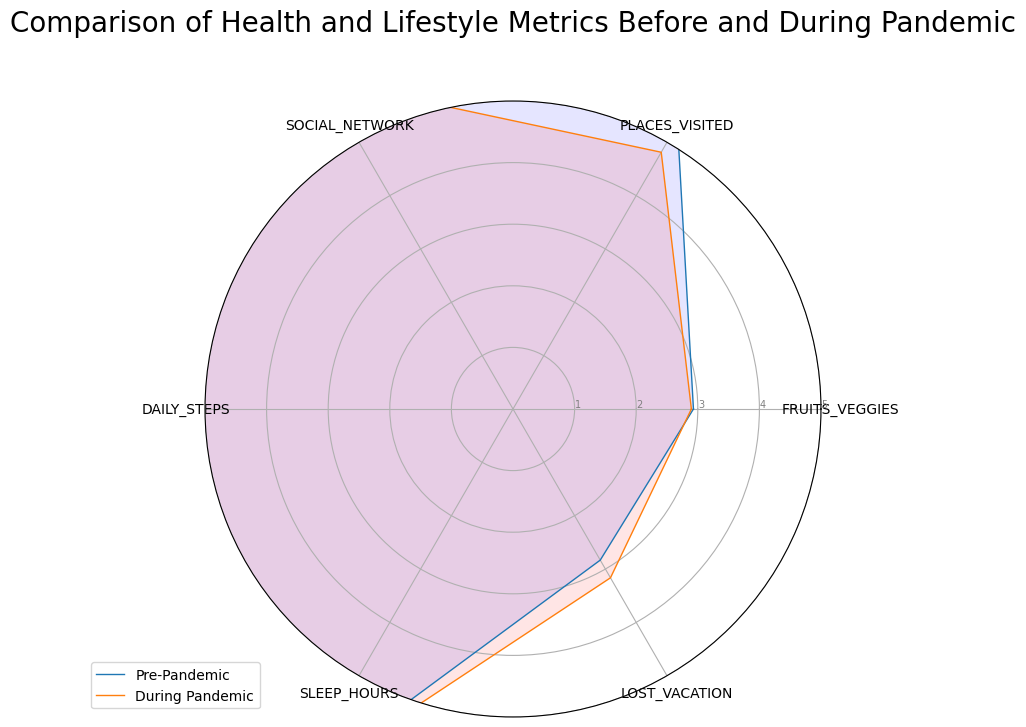

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Sample data loading step - replace with your actual data loading code
# df_selected = pd.read_csv('your_data.csv')

# Convert 'Timestamp' to datetime and sort the DataFrame if not already sorted
df_selected['Timestamp'] = pd.to_datetime(df_selected['Timestamp'])
df_selected.sort_values('Timestamp', inplace=True)

# Define the start date of the pandemic for comparison
pandemic_start_date = pd.to_datetime('2020-03-01')

# Split the DataFrame into pre-pandemic and during-pandemic
pre_pandemic_df = df_selected[df_selected['Timestamp'] < pandemic_start_date]
during_pandemic_df = df_selected[df_selected['Timestamp'] >= pandemic_start_date]

# Calculate the mean of each variable for pre-pandemic and during-pandemic
variables = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'SOCIAL_NETWORK', 'DAILY_STEPS', 'SLEEP_HOURS', 'LOST_VACATION']
pre_pandemic_means = pre_pandemic_df[variables].mean().tolist()
during_pandemic_means = during_pandemic_df[variables].mean().tolist()

# The plot is made on a circle, so we need to "complete the loop" and append the start to the end.
pre_pandemic_means += pre_pandemic_means[:1]
during_pandemic_means += during_pandemic_means[:1]

# Number of variables we're plotting.
num_vars = len(variables)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], variables)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
plt.ylim(0, 5)

# Plot data
ax.plot(angles, pre_pandemic_means, linewidth=1, linestyle='solid', label='Pre-Pandemic')
ax.fill(angles, pre_pandemic_means, 'b', alpha=0.1)

ax.plot(angles, during_pandemic_means, linewidth=1, linestyle='solid', label='During Pandemic')
ax.fill(angles, during_pandemic_means, 'r', alpha=0.1)

# Add a title
plt.title('Comparison of Health and Lifestyle Metrics Before and During Pandemic', size=20, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


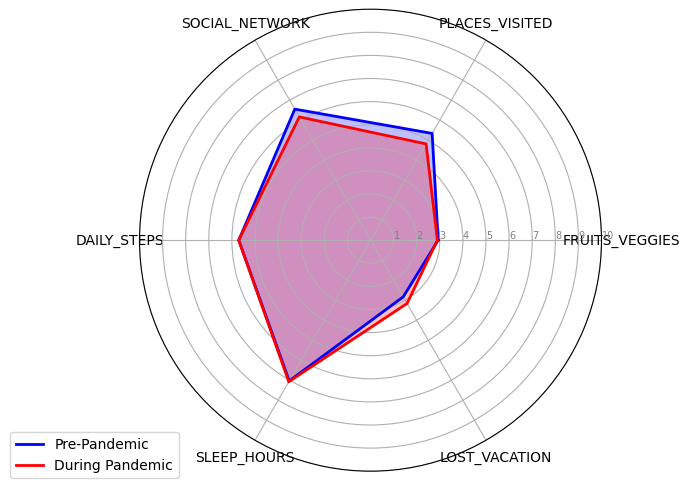

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Assuming df_selected is your DataFrame and it's already loaded.

pandemic_start_date = pd.to_datetime('2020-03-01')

# Split the DataFrame into pre-pandemic and during-pandemic
pre_pandemic_df = df_selected[df_selected['Timestamp'] < pandemic_start_date]
during_pandemic_df = df_selected[df_selected['Timestamp'] >= pandemic_start_date]

# Calculate the mean of each variable for pre-pandemic and during-pandemic
categories = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'SOCIAL_NETWORK', 'DAILY_STEPS', 'SLEEP_HOURS', 'LOST_VACATION']
pre_pandemic_means = pre_pandemic_df[categories].mean().values.flatten().tolist()
during_pandemic_means = during_pandemic_df[categories].mean().values.flatten().tolist()

# Number of variables we're plotting.
num_vars = len(categories)

# Compute angle each category is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# The means lists need to be "completed" as well by adding the first value to the end.
pre_pandemic_means += pre_pandemic_means[:1]
during_pandemic_means += during_pandemic_means[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels and set scale
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], color="grey", size=7)
plt.ylim(0, 10)

# Plot data
ax.plot(angles, pre_pandemic_means, color='blue', linewidth=2, linestyle='solid', label='Pre-Pandemic')
ax.fill(angles, pre_pandemic_means, color='blue', alpha=0.25)

ax.plot(angles, during_pandemic_means, color='red', linewidth=2, linestyle='solid', label='During Pandemic')
ax.fill(angles, during_pandemic_means, color='red', alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()
